<a href="https://colab.research.google.com/github/mqquiroz/ICV411/blob/main/Ejercicio_NPSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICV 411 - Hidráulica 
## Universidad Católica del Maule

In [59]:
from google.colab import files
from IPython.display import Image

In [58]:
uploaded = files.upload()

Saving Picture1.png to Picture1.png


### Ejercicio $NPSH$

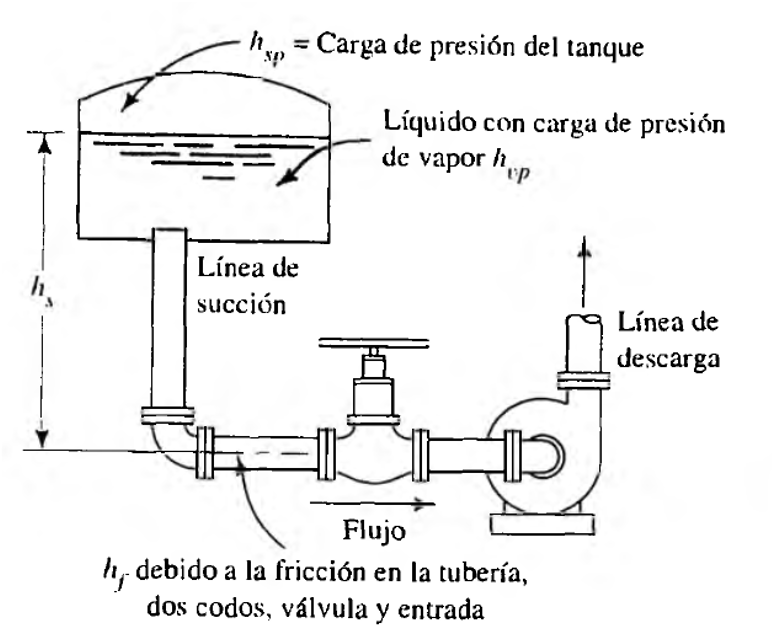

In [65]:
Image('Picture1.png', width = 450)

Determine $NPSH$ disponible para el sistema de la figura. El fluido está en un tanque cerrado con presión de -20 kPa sobre el agua a 70°C. La presión atmosférica es de 100.5 kPa. El nivel del agua en el tanque es de 2.5 m sobre la entrada de la bomba. La tubería es de acero, de 1 1/2 pulgadas (DN: 40 mm) y longitud total de 12.0 m. El codo es estándar, la válvula es de globo y está abierta por completo. El flujo volumétrico es de 95 L/min.



Además:

$\gamma$ = 9590 ($N/m^3$)

$h_{vp}$ = 3.25 m (a 70ºC)

$\nu$ = 4,11 *10-7 ($m^2/s$)
$\varepsilon$ = 4,6 *10-5 (m)


La formula de NSPH viene dada por:

\begin{equation}
NSPH = h_{sp} \pm h_{s} - h_{f} - h_{vp}
\end{equation}

Donde:

| Variable | Definición |
| ------ | ---------- |
| $P_{sp}$   | Presión estática (absoluta) sobre el fluido en el depósito   |
| $h_{sp}$   | Carga de presión estática (absoluta) sobre el fluido en el almacenamiento. Se expresa en metros:  $h_sp=P_{sp}⁄\gamma$   |
|$h_{s}$	|Diferencia de elevación desde el nivel del fluido en el depósito a la línea 	central de la entrada de succión de la bomba; se expresa en metros.|
|	   | Si la bomba está abajo del depósito, hs es positiva|
|	   | Si la bomba está arriba del depósito, hs es negativa|
| $h_{f}$ | Pérdida de carga en la tubería de succión, debido a la fricción y pérdidas menores; se expresa en metros|.
|$P_ {vp}$	| Presión de vapor (absoluta) del liquido a la temperatura a que se bombea |
|$h_{vp}$	| Carga de presión de vapor del líquido a la temperatura de bombeo; se expresa en metros; $h_vp=P_{vp}⁄\gamma $|


In [66]:
#Importamos librerias a utilizar
import numpy as np

#Datos

gamma = 9590 #(N/m^3) Peso Específico 
nu    = 4.11*(10**-7) #(m/s) #Viscosidad cinemática
e     = 4.6*(10**-5) #(m) Rugosidad
p_tanque = -20 # (kPa) Presión en el tanque
p_atm = 100.5 #(kPa)
D = 40.0 #(mm) Diámetro tubería
L = 12 #(m) Longitud tubería
Q = 95 #(L/min) Flujo Volumétrico (Caudal)
g = 9.81 #(m/s^2) Aceleración de gravedad

En primer lugar, se encuentra $h_{sp}$, sabiendo que La presión absoluta es igual a la presión atmosférica más la presión manométrica en el tanque: 

In [67]:
p_abs = p_atm + p_tanque
h_sp  = p_abs*10**3/gamma
print('la carga de presión estática es: ',np.round(h_sp,2), 'm')

la carga de presión estática es:  8.39 m


Ahora con base en la elevación del tanque, tenemos que:

In [68]:
h_s = 2.5 #(m)

Para encontrar las pérdidas friccionales $h_{f}$, debemos encontrar la velocidad, el número de Reynolds, la rugosidad relativa y el factor de fricción:

In [69]:
D_SI = D/1000 #(m)
Q_SI = Q/60000 #(m^3/s)

A = np.pi*(D_SI**2)/4 #(m^2) # Área tubería

v = Q_SI/A #(m/s) Velocidad

Re = v*D_SI/nu

e_D = e/D_SI

print('la velocidad es: ',np.round(v,2),'m/s')
print('el número de Reynolds es: ',"{:.2e}".format(Re))
print('la rugosidad relativa es: ',np.round(e_D,5))

la velocidad es:  1.26 m/s
el número de Reynolds es:  1.23e+05
la rugosidad relativa es:  0.00115


Del Diagrama de Moody podemos extraer $f = f(Re,\varepsilon/D)=0.0225$

De la tabla anterior, $f_{T}=0.021$, ahora tenemos:

\begin{equation}
h_{f} = \underbrace{f\displaystyle\frac{L}{D}\frac{v^2}{2g}}_{Tubería} + \underbrace{2f_{T}\displaystyle (30)\frac{v^2}{2g}}_{Codos} + \underbrace{f_{T}\displaystyle (340)\frac{v^2}{2g}}_{válvula} + \underbrace{1.0\displaystyle\frac{v^2}{2g}}_{entrada} \nonumber
\end{equation}

La carga de velocidad es:

In [70]:
c_v = (v**2)/(2*g)
print(np.round(c_v,3),'m')

0.081 m


Así:

In [71]:
f   = 0.0225 #fractor de fricción (tubería)
f_t = 0.021 #factor de fricción equivalente (pérdidas singulares)

h_f = f*(L/D_SI)*c_v + (2*f_t*30*c_v) + (f_t*340*c_v) + (1.0*c_v)

print('La pérdida por fricción es',np.round(h_f,2),'m')

La pérdida por fricción es 1.31 m


Sabemos que la altura de presion de vapor es:

In [72]:
h_vp  = 3.25 #(m) Carga de presión de vapor (a 70°C)

De esta manera, la $NPSH$ disponible es:

In [73]:
NPSH = h_sp + h_s - h_f - h_vp

print('La NPSH disponible es',np.round(NPSH,2),'m')

La NPSH disponible es 6.34 m
